# Define the system  

<Axes: title={'center': 'networks/Net0.inp'}>

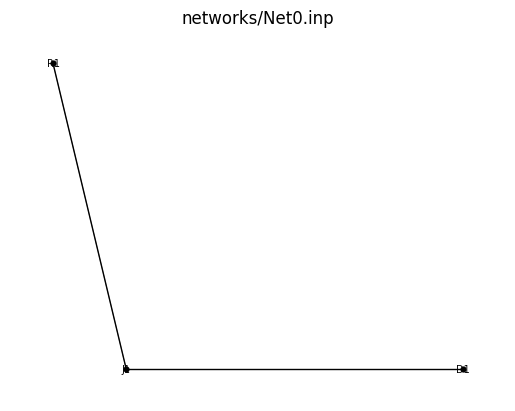

In [1]:
import wntr
import wntr_quantum

# Create a water network model
inp_file = "networks/Net0.inp"
wn = wntr.network.WaterNetworkModel(inp_file)

# Graph the network
wntr.graphics.plot_network(wn, title=wn.name, node_labels=True)

## Solve Classically
we use the default solver of the QuantumWNTRSimulator, that uses a LU solver, a s a benchmark of the calculation

Success [0. 0. 0. 0.]
Success [0. 0. 0. 0.]


/home/nico/miniconda3/envs/vitens/lib/python3.9/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)


<Axes: title={'center': 'Pressure at 5 hours'}>

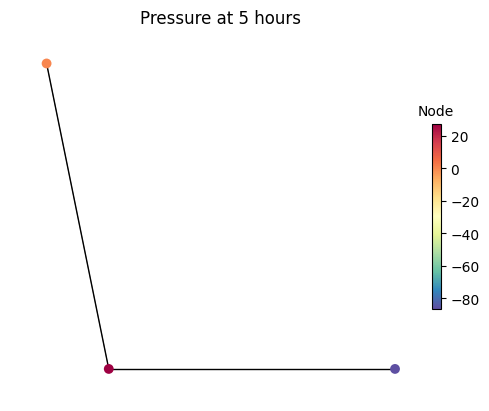

In [2]:
sim = wntr_quantum.sim.QuantumWNTRSimulator(wn)
results = sim.run_sim()
# Plot results on the network
pressure_at_5hr = results.node["pressure"].loc[0, :]
wntr.graphics.plot_network(
    wn,
    node_attribute=pressure_at_5hr,
    node_size=50,
    title="Pressure at 5 hours",
    node_labels=False,
)

## Solve with the quantum reordering
The quantum reordering solver use a QUBO approach to find the optimal reordering of the matrix. For small matrices as this one it doesn't change anything compared to the classical approach

In [5]:
# Simulate hydraulics
from dwave.samplers import SimulatedAnnealingSampler
from quantum_newton_raphson.splu_solver import SPLU_SOLVER
from quantum_newton_raphson.splu_solver import QUBOReorder

wn = wntr.network.WaterNetworkModel(inp_file)

# instantiate the quantum reorder solver using a DWAVE sampler
reorder_solver = QUBOReorder(sampler=SimulatedAnnealingSampler())

# define the linear solver with the reorder solver
linear_solver = SPLU_SOLVER(reorder_solver=reorder_solver)
sim = wntr_quantum.sim.QuantumWNTRSimulator(wn, linear_solver=linear_solver)
results = sim.run_sim(
    linear_solver=linear_solver, solver_options={"TOL": 1e-6, "FIXED_POINT": False}
)

Success [-1.421e-14  0.000e+00  0.000e+00  0.000e+00]
Success [-1.421e-14  0.000e+00  0.000e+00  0.000e+00]


/home/nico/miniconda3/envs/vitens/lib/python3.9/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)


<Axes: title={'center': 'Pressure at 5 hours'}>

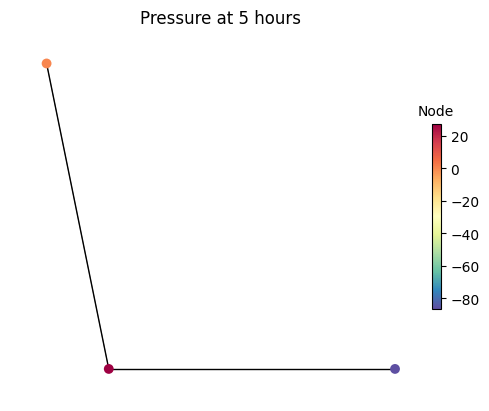

In [6]:
# Plot results on the network
pressure_at_5hr = results.node["pressure"].loc[0, :]
wntr.graphics.plot_network(
    wn,
    node_attribute=pressure_at_5hr,
    node_size=50,
    title="Pressure at 5 hours",
    node_labels=False,
)

## Solve with the QUBO Linear Solver
We then use the QUBO linear solver within the Quantum Newton Raphson

In [8]:
# Simulate hydraulics
from dwave.samplers import SimulatedAnnealingSampler
from quantum_newton_raphson.qubo_solver import QUBO_SOLVER

wn = wntr.network.WaterNetworkModel(inp_file)

# define the linear solver with the reorder solver
linear_solver = QUBO_SOLVER(num_qbits=15, num_reads=200)
sim = wntr_quantum.sim.QuantumWNTRSimulator(wn, linear_solver=linear_solver)
results = sim.run_sim(
    linear_solver=linear_solver, solver_options={"TOL": 1e-1, "FIXED_POINT": True}
)

/home/nico/QuantumApplicationLab/vitens/wntr-quantum/wntr_quantum/sim/core.py:197: UserWarning: Simulation did not converge at time 00:00:00. Line search failed at iteration 0
  warnings.warn(


In [ ]:
# Plot results on the network
pressure_at_5hr = results.node["pressure"].loc[0, :]
wntr.graphics.plot_network(
    wn,
    node_attribute=pressure_at_5hr,
    node_size=50,
    title="Pressure at 5 hours",
    node_labels=False,
)

## VQLS Solver
We now use the VQLS solver

In [ ]:
# Simulate hydraulics
from quantum_newton_raphson.vqls_solver import VQLS_SOLVER
from qiskit.primitives import Estimator
from qiskit.circuit.library import RealAmplitudes
from qiskit_algorithms.optimizers import CG, ADAM, COBYLA

wn = wntr.network.WaterNetworkModel(inp_file)

estimator = Estimator()
ansatz = RealAmplitudes(num_qubits=2, reps=3, entanglement="full")
opt = CG()

# define the linear solver with the reorder solver
linear_solver = VQLS_SOLVER(
    estimator=estimator,
    ansatz=ansatz,
    optimizer=opt,
    matrix_decomposition="pauli",
    verbose=True,
)
sim = wntr_quantum.sim.QuantumWNTRSimulator(wn, linear_solver=linear_solver)
results = sim.run_sim(linear_solver=linear_solver, solver_options={"TOL": 1e-1})

In [ ]:
import numpy as np

A = np.array(
    [
        [1.226e01, -1.000e00, 3.356e00, 0.000e00],
        [-1.000e00, 2.263e04, -1.504e02, 1.504e02],
        [3.356e00, -1.504e02, 2.000e00, -1.000e00],
        [0.000e00, 1.504e02, -1.000e00, 1.000e00],
    ]
)

In [ ]:
u, v = np.linalg.eigh(A)

In [ ]:
u